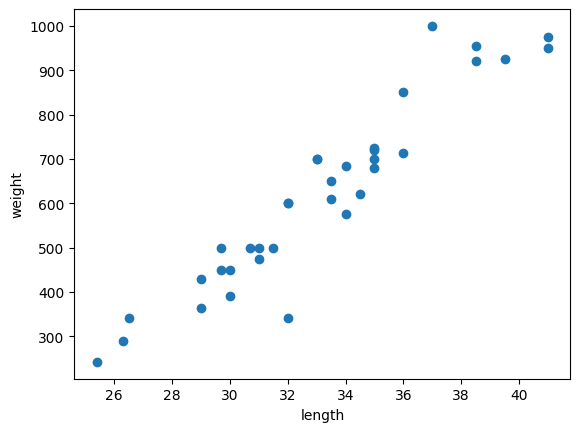

In [1]:
# 도미생선
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형회귀 - 직선의 방정식을 풀어서 예측
  
  weight = m*lenght + b

In [ ]:
# 기울기 m과 절편 b를 임의로 0으로 초기화 , 학습률도 설정
# 손실함수 예측값 실제값의 차이의 제곱의 평균인 MSE  계산

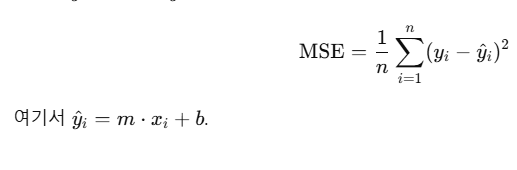


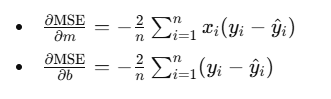

In [ ]:
# 스케일링 : 큰 데이터를 작게 - 데이터의 특성을 유지한채로


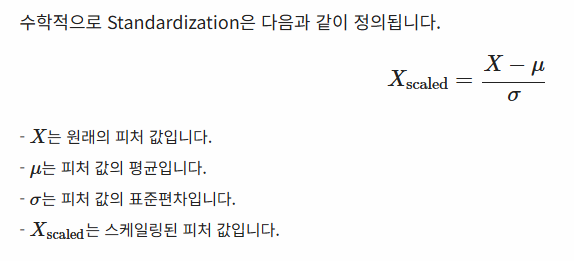

In [39]:
# 데이터 정규화
import numpy as np
bream_length_mean = np.mean(bream_length)
bream_length_std = np.std(bream_length)
bream_length_scaled = [(x-bream_length_mean)/bream_length_std for x in bream_length]

bream_weight_mean = np.mean(bream_weight)
bream_weight_std = np.std(bream_weight)
bream_weight_scaled = [(x-bream_weight_mean)/bream_weight_std for x in bream_weight]


In [40]:
m,b = 0.0 , 0.0  # 기울기와 절편
lr = 0.0001  # 학습률
epochs = 5000 # 반복횟수
n = len(bream_length)  # 데이터의 갯수

In [41]:
# 경사 하강법
from tqdm import tqdm
iteration = tqdm(range(epochs))
for epoch in iteration:
  y_pred = [ m*x+b  for x in bream_length_scaled  ] # 예측값
  error =  [y-y_hat  for y,y_hat in  zip(bream_weight_scaled,y_pred)] # 오차
  # 기울기 계산
  dm = -(2/n)*sum( x*e for x,e in zip(bream_length_scaled, error)  )
  db = -(2/n)*sum(error)
  # 업데이트
  m -= lr*dm
  b -= lr*db
  mse = sum( e**2 for e in error) / n
  iteration.set_description(f'mse : {mse:.2f}')

# 결과
print("")
print(f"최종 모델 : weight = {m:.4f}*length + {b:.4f}")


mse : 0.23: 100%|██████████| 5000/5000 [00:10<00:00, 485.71it/s]


최종 모델 : weight = 0.5982*length + 0.0000


In [43]:
# 길이가 37이면 무게는?
0.5982*37 + 0.0000

22.133399999999998

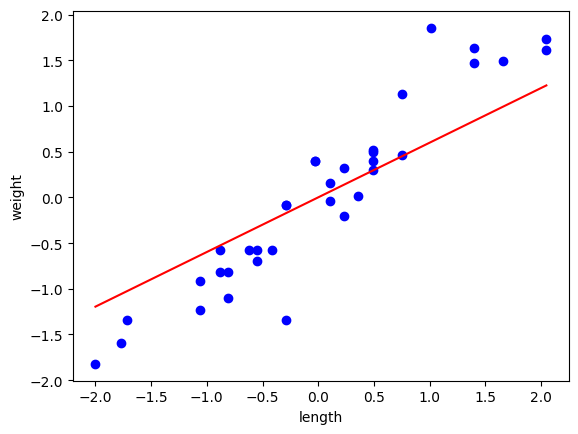

In [46]:
# 시각적으로 표현
import matplotlib.pyplot as plt
# 예측값
# bream_length 정렬
bream_length = sorted(bream_length)
predict_weight = [ m*x+b for x in  bream_length_scaled]

plt.scatter(bream_length_scaled,bream_weight_scaled,color='blue',label = 'Actual')
plt.plot(bream_length_scaled,predict_weight,color='red',label='Predict')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 110 120 130 140 150
# 1 2 3 4 5 6 7

In [63]:
# 경사 하강법
from tqdm import tqdm
def train(x_train,y_train,lr=0.0001,epochs=5000):
  iteration = tqdm(range(epochs))
  m,b = 0.0, 0.0
  for epoch in iteration:
    y_pred = [ m*x+b  for x in x_train  ] # 예측값
    error =  [y-y_hat  for y,y_hat in  zip(y_train,y_pred)] # 오차
    # 기울기 계산
    dm = -(2/n)*sum( x*e for x,e in zip(x_train, error)  )
    db = -(2/n)*sum(error)
    # 업데이트
    m -= lr*dm
    b -= lr*db
    mse = sum( e**2 for e in error) / n
    iteration.set_description(f'mse : {mse:.2f}')
  return m,b


In [ ]:
m,b = train(bream_length, bream_weight)

mse : 19208.51:  55%|█████▍    | 2749/5000 [00:05<00:03, 574.10it/s]

In [ ]:
m_scaled, b_scaled = train(bream_length_scaled, bream_weight_scaled)

In [ ]:
# 스케일링 인공지능에서 대단히 중요한 역활
# 데이터이 단위(범위)를 맞춰준다.--> 데이터 특성은 유지
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(bream_length_scaled,bream_weight_scaled,color='blue',label = 'scaled')
plt.plot(bream_length_scaled, m_scaled*np.array(bream_length_scaled)+b_scaled,color='red',label='Predict')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(bream_length,bream_weight,color='blue',label = 'Real')
plt.plot(bream_length, m*np.array(bream_length)+b,color='red',label='Predict')
plt.legend()
plt.show()